In [33]:
import pickle
from tqdm import tqdm
from itertools import islice
from itertools import accumulate
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [9]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

# Overview

Testing for preferential attachment calculations using dictionaries instead of igraph networks

This may eventually not be needed, but just in case...

### Step 1: find cpd-patent dictionary

Goal is to find/build a {cpd: [patents]} data structure, holding all patents from a specific month. This can be used as the basis to calculate degree of cpds over time

In [2]:
fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_1976-01.p"
data = pickle.load(file=open(fp, "rb"))
print(type(data))
print(data)

<class 'list'>
[('SCHEMBL1357473', 'US-3931246-A'), ('SCHEMBL11215078', 'US-3935183-A'), ('SCHEMBL10637580', 'US-3933804-A'), ('SCHEMBL912522', 'US-3931295-A'), ('SCHEMBL124830', 'US-3931283-A'), ('SCHEMBL11138982', 'US-3932502-A'), ('SCHEMBL20619', 'US-3932193-A'), ('SCHEMBL11686806', 'US-3933795-A'), ('SCHEMBL10850', 'US-3935132-A'), ('SCHEMBL35642', 'US-3931060-A'), ('SCHEMBL1961', 'US-3933835-A'), ('SCHEMBL3792594', 'US-3931258-A'), ('SCHEMBL93460', 'US-3935163-A'), ('SCHEMBL6129993', 'US-3931166-A'), ('SCHEMBL108259', 'US-3933750-A'), ('SCHEMBL229650', 'US-3931245-A'), ('SCHEMBL26508', 'US-3933945-A'), ('SCHEMBL6842545', 'US-3931289-A'), ('SCHEMBL11325582', 'US-3932381-A'), ('SCHEMBL11816694', 'US-3932384-A'), ('SCHEMBL3279', 'US-3933899-A'), ('SCHEMBL11776542', 'US-3931185-A'), ('SCHEMBL2001976', 'US-3933786-A'), ('SCHEMBL11871927', 'US-3932632-A'), ('SCHEMBL2150710', 'US-3933891-A'), ('SCHEMBL21233', 'US-3932448-A'), ('SCHEMBL11673143', 'US-3932661-A'), ('SCHEMBL11864760', 'US-3

In [4]:

for edge in tqdm(data):
    if edge[0] not in cpd_patents:
        cpd_patents[edge[0]] = [edge[1]]
    else:
        cpd_patents[edge[0]].append(edge[1])
        
print(cpd_patents)

100%|███████████████████████████████████████████████████████████████████████| 62093/62093 [00:00<00:00, 1131542.35it/s]

{'SCHEMBL1357473': ['US-3931246-A', 'US-3931166-A', 'US-3931245-A'], 'SCHEMBL11215078': ['US-3935183-A'], 'SCHEMBL10637580': ['US-3933804-A'], 'SCHEMBL912522': ['US-3931295-A'], 'SCHEMBL124830': ['US-3931283-A', 'US-3933897-A', 'US-3931279-A', 'US-3933898-A', 'US-3931284-A', 'US-3933895-A', 'US-3933889-A', 'US-3933891-A', 'US-3932477-A', 'US-3933899-A', 'US-3932389-A', 'US-3933896-A', 'US-3933900-A', 'US-3931289-A'], 'SCHEMBL11138982': ['US-3932502-A', 'US-3931310-A'], 'SCHEMBL20619': ['US-3932193-A', 'US-3931279-A', 'US-3931289-A', 'US-3933889-A', 'US-3933897-A', 'US-3933895-A', 'US-3933898-A', 'US-3931148-A', 'US-3932296-A', 'US-3931283-A', 'US-3932288-A', 'US-3933813-A', 'US-3933737-A', 'US-3933899-A', 'US-3935266-A', 'US-3932389-A', 'US-3931284-A', 'US-3933896-A', 'US-3933900-A', 'US-3933891-A'], 'SCHEMBL11686806': ['US-3933795-A'], 'SCHEMBL10850': ['US-3935132-A', 'US-3932337-A', 'US-3931068-A', 'US-3933756-A', 'US-3933548-A', 'US-3931113-A', 'US-3932293-A', 'US-3933930-A', 'US-39

In [5]:
print(len(cpd_patents))

37246


In [7]:
cpd_degrees = {}

for cpd, patents in tqdm(cpd_patents.items()):
    cpd_degrees[cpd] = [len(patents)]
    
print(cpd_degrees)

100%|███████████████████████████████████████████████████████████████████████| 37246/37246 [00:00<00:00, 1435446.21it/s]

{'SCHEMBL1357473': [3], 'SCHEMBL11215078': [1], 'SCHEMBL10637580': [1], 'SCHEMBL912522': [1], 'SCHEMBL124830': [14], 'SCHEMBL11138982': [2], 'SCHEMBL20619': [20], 'SCHEMBL11686806': [1], 'SCHEMBL10850': [9], 'SCHEMBL35642': [1], 'SCHEMBL1961': [11], 'SCHEMBL3792594': [1], 'SCHEMBL93460': [1], 'SCHEMBL6129993': [3], 'SCHEMBL108259': [5], 'SCHEMBL229650': [4], 'SCHEMBL26508': [6], 'SCHEMBL6842545': [13], 'SCHEMBL11325582': [1], 'SCHEMBL11816694': [1], 'SCHEMBL3279': [14], 'SCHEMBL11776542': [1], 'SCHEMBL2001976': [2], 'SCHEMBL11871927': [1], 'SCHEMBL2150710': [3], 'SCHEMBL21233': [7], 'SCHEMBL11673143': [1], 'SCHEMBL11864760': [1], 'SCHEMBL39010': [5], 'SCHEMBL1138': [44], 'SCHEMBL11857480': [1], 'SCHEMBL11550267': [2], 'SCHEMBL11750949': [1], 'SCHEMBL11626234': [1], 'SCHEMBL11773844': [1], 'SCHEMBL15681': [7], 'SCHEMBL6844': [28], 'SCHEMBL1378': [130], 'SCHEMBL11803583': [1], 'SCHEMBL26562': [4], 'SCHEMBL3381': [27], 'SCHEMBL170639': [4], 'SCHEMBL403986': [1], 'SCHEMBL9240240': [1], 'SC

### Step 2: Extend to a full year

Find degrees over a full year

In [13]:
cpd_degrees = {}
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

for i in tqdm(range(len(months))):
    fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_1980-" + months[i] + ".p"
    data = pickle.load(file=open(fp, "rb"))
    
    #Build cpd/patent ids for an individual month
    cpd_patents = {}
    for edge in data:
        if edge[0] not in cpd_patents:
            cpd_patents[edge[0]] = [edge[1]]
        else:
            cpd_patents[edge[0]].append(edge[1])
            
    #Add degrees to full degree list
    
    #Starting with compounds found in a specific month
    for cpd, patents in cpd_patents.items():
        if cpd not in cpd_degrees:
            #Add 0s for months where a compound doesn't appear
            cpd_degrees[cpd] = [0]*i + [len(patents)]
        else:
            #Otherwise add length of degree list
            cpd_degrees[cpd].append(len(patents))
            
    #Add 0s for compounds not found in a specific month
    for cpd in [c for c in cpd_degrees.keys() if c not in cpd_patents.keys()]:
        cpd_degrees[cpd].append(0)
        
print(list(islice(cpd_degrees.items(),100)))

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [00:26<00:00,  2.23s/it]

[('SCHEMBL11310284', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL7622', [7, 2, 0, 4, 2, 3, 0, 3, 8, 6, 1, 5]), ('SCHEMBL11085183', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL165217', [4, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 1]), ('SCHEMBL70835', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL17819', [5, 5, 7, 6, 4, 12, 3, 8, 9, 11, 9, 11]), ('SCHEMBL1967', [43, 36, 46, 52, 44, 45, 40, 50, 55, 51, 47, 55]), ('SCHEMBL78119', [1, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 0]), ('SCHEMBL11252681', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL545308', [1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]), ('SCHEMBL15516', [81, 67, 57, 84, 94, 57, 69, 68, 98, 80, 82, 84]), ('SCHEMBL11411231', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL762', [96, 70, 60, 97, 68, 98, 73, 82, 95, 110, 94, 98]), ('SCHEMBL11427360', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL17612', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL11080172', [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), ('SCHEMBL325141', [1, 0, 0, 1, 1, 1, 0, 0, 0, 1

In [12]:
#Testing if all months are accounted for (no message = success)
for degrees in tqdm(cpd_degrees.values()):
    if len(degrees) != 12:
        print(degrees)

100%|█████████████████████████████████████████████████████████████████████| 219007/219007 [00:00<00:00, 2204494.36it/s]


In [15]:
#Find cumulative sum of patents
for key, value in tqdm(cpd_degrees.items()):
    cum_value = list(accumulate(value))
    cpd_degrees[key] = cum_value
    
print(list(islice(cpd_degrees.items(),100)))

100%|██████████████████████████████████████████████████████████████████████| 216978/216978 [00:00<00:00, 835922.83it/s]

[('SCHEMBL11310284', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL7622', [7, 9, 9, 13, 15, 18, 18, 21, 29, 35, 36, 41]), ('SCHEMBL11085183', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL165217', [4, 4, 5, 6, 6, 8, 9, 9, 9, 9, 9, 10]), ('SCHEMBL70835', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL17819', [5, 10, 17, 23, 27, 39, 42, 50, 59, 70, 79, 90]), ('SCHEMBL1967', [43, 79, 125, 177, 221, 266, 306, 356, 411, 462, 509, 564]), ('SCHEMBL78119', [1, 1, 2, 3, 4, 4, 6, 7, 9, 10, 10, 10]), ('SCHEMBL11252681', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL545308', [1, 1, 1, 2, 2, 2, 2, 3, 4, 4, 4, 4]), ('SCHEMBL15516', [81, 148, 205, 289, 383, 440, 509, 577, 675, 755, 837, 921]), ('SCHEMBL11411231', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL762', [96, 166, 226, 323, 391, 489, 562, 644, 739, 849, 943, 1041]), ('SCHEMBL11427360', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL17612', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]), ('SCHEMBL11080172', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Step 3 (final!): Extend to a range of years

Build preferential attachment over a range of years

In [28]:
def build_month_list(start, end):
    """ Builds a list of all months in a given range

    Args:
        start (int): year describing the start of the data
        end (int): year describing the end of the data (inclusive)

    Returns:
        list: list of all update months in format "YYYY-MM"
    """
    updates = []
    for year in range(start, end + 1):  # all years through the given end
        for month in range(1, 13):  #include 12 months
            if month < 10:
                updates.append(str(year) + "-0" + str(month))
            else:
                updates.append(str(year) + "-" + str(month))

    return updates

In [37]:
def build_cpd_degrees(start, stop):
    print("----- Building Cpd-Degree for Individual Months -----")
    sleep(0.2)

    updates = build_month_list(start, stop)
    cpd_degrees = {}

    for i in tqdm(range(len(updates))):
        fp = "G:\\Shared drives\\SureChemBL_Patents\\CpdPatentIdsDates\\cpd_patent_edges_" + updates[i] + ".p"
        data = pickle.load(file=open(fp, "rb"))

        #Build cpd/patent ids for an individual month
        cpd_patents = {}
        for edge in data:
            if edge[0] not in cpd_patents:
                cpd_patents[edge[0]] = [edge[1]]
            else:
                cpd_patents[edge[0]].append(edge[1])

        #Add degrees to full degree list

        #Starting with compounds found in a specific month
        for cpd, patents in cpd_patents.items():
            if cpd not in cpd_degrees:
                #Add 0s for months where a compound doesn't appear
                cpd_degrees[cpd] = [0]*i + [len(patents)]
            else:
                #Otherwise add length of degree list
                cpd_degrees[cpd].append(len(patents))

        #Add 0s for compounds not found in a specific month
        for cpd in [c for c in cpd_degrees.keys() if c not in cpd_patents.keys()]:
            cpd_degrees[cpd].append(0)
            
    #Find cumulative sum of patents
    print("----- Calculating Cumulative Degree Sums -----")
    sleep(0.2)
    for key, value in tqdm(cpd_degrees.items()):
        cum_value = list(accumulate(value))
        cpd_degrees[key] = cum_value

    return cpd_degrees

In [40]:
def calculate_pref_attachment(cpd_degrees):
    print("----- Calculating Attachment Index -----")
    sleep(0.2)
    #Calcualate preferential attachment
    pref_attach_dict = {}

    for key, value in tqdm(cpd_degrees.items()):
        c = 0
        attachments = []
        while c < len(value) - 1:
            attachments.append(value[c + 1] - value[c])
            c += 1
        pref_attach_dict[key] = np.mean(attachments)

    return pref_attach_dict

In [ ]:
pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

for pair in pairs:
    start = pair[0]
    stop = pair[1]
    print("----- CALCULATING FOR", start, "-", stop, " -----")
    cpd_degrees = build_cpd_degrees(start, stop)
    pref_attach_dict = calculate_pref_attachment(cpd_degrees)

    #Save both cpd_degrees and preferential attachment calculations
    pickle.dump(cpd_degrees, file=open("Data/Attachment_noNetworks/cpd_degrees_" + str(start) + "_" + str(stop) + ".p", "wb"))
    pickle.dump(pref_attach_dict, file=open("Data/Attachment_noNetworks/pref_attach_" + str(start) + "_" + str(stop) + ".p", "wb"))

    print()

----- CALCULATING FOR 1980 - 1984  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [00:23<00:00,  2.52it/s]


----- Calculating Cumulative Degree Sums -----


100%|██████████████████████████████████████████████████████████████████████| 735597/735597 [00:01<00:00, 454456.97it/s]


----- Calculating Attachment Index -----


100%|███████████████████████████████████████████████████████████████████████| 735597/735597 [00:18<00:00, 38817.60it/s]



----- CALCULATING FOR 1985 - 1989  -----
----- Building Cpd-Degree for Individual Months -----


  0%|                                                                                       | 0/959055 [00:00<?, ?it/s]

----- Calculating Cumulative Degree Sums -----


100%|██████████████████████████████████████████████████████████████████████| 959055/959055 [00:02<00:00, 427460.85it/s]


----- Calculating Attachment Index -----


100%|███████████████████████████████████████████████████████████████████████| 959055/959055 [00:25<00:00, 38279.26it/s]



----- CALCULATING FOR 1990 - 1994  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [04:44<00:00,  4.74s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 1273645/1273645 [00:02<00:00, 435825.03it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 1273645/1273645 [00:33<00:00, 37656.98it/s]



----- CALCULATING FOR 1995 - 1999  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [06:45<00:00,  6.76s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 1664272/1664272 [00:03<00:00, 435452.02it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 1664272/1664272 [00:46<00:00, 36124.72it/s]



----- CALCULATING FOR 2000 - 2004  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [02:16<00:00,  2.27s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 2750039/2750039 [00:06<00:00, 418787.00it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 2750039/2750039 [01:15<00:00, 36373.76it/s]



----- CALCULATING FOR 2005 - 2009  -----
----- Building Cpd-Degree for Individual Months -----


100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [24:07<00:00, 24.12s/it]


----- Calculating Cumulative Degree Sums -----


100%|████████████████████████████████████████████████████████████████████| 5721145/5721145 [00:13<00:00, 439355.52it/s]


----- Calculating Attachment Index -----


100%|█████████████████████████████████████████████████████████████████████| 5721145/5721145 [02:30<00:00, 37974.24it/s]



----- CALCULATING FOR 2010 - 2014  -----
----- Building Cpd-Degree for Individual Months -----


 30%|████████████████████████▌                                                         | 18/60 [08:48<21:45, 31.09s/it]

Text(0, 0.5, 'Average Attachment Index')

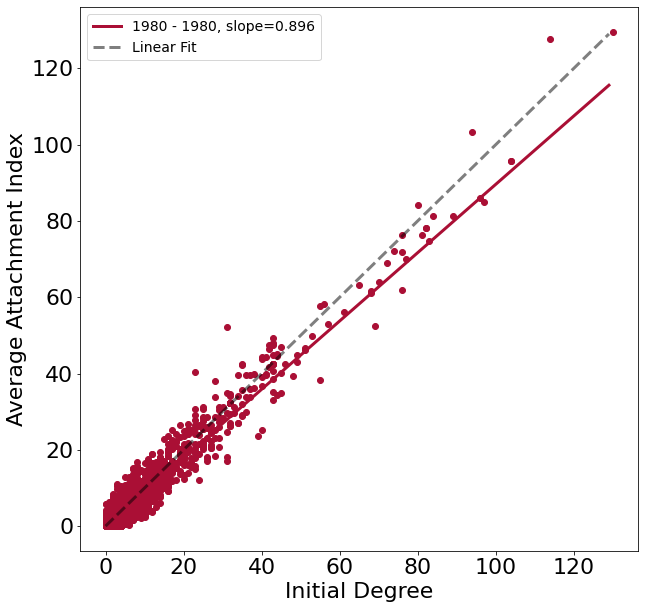

In [25]:
initial_degrees = []

for key, value in cpd_degrees.items():
    initial_degrees.append(value[0])
    
# print(initial_degrees[0:100])
# print(list(pref_attach_dict.values())[0:100])

plt.figure(figsize=(10,10))

plt.scatter(initial_degrees, pref_attach_dict.values(), color=colors[str(start)])

m,b = np.polyfit(initial_degrees, list(pref_attach_dict.values()), 1)
plt.plot(np.arange(0,max(initial_degrees),1), m*np.arange(0,max(initial_degrees),1) + b,
        label=str(start) + " - " + str(stop) + ", slope=" + str(round(m,3)),
        color=colors[str(start)], linewidth=3)

#Linear line for comparison
x = np.arange(0,max(initial_degrees),1)
plt.plot(x, x, "--", color="k", alpha=0.5, linewidth=3, label="Linear Fit")

plt.legend(prop={"size":14})
plt.xlabel("Initial Degree")
plt.ylabel("Average Attachment Index")